In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels as sm
import mysql.connector as mysql


In [32]:


HOST = "mysql3001.mochahost.com"
DATABASE = "brbr77_avasanet"
USER = "brbr77_auditor"
PASSWORD = "BrainPowder"

db_connection = mysql.connect(host=HOST, 
                              database=DATABASE, 
                              user=USER, 
                              password=PASSWORD)

print("Connected to:", db_connection.get_server_info())

Connected to: 5.6.33


In [33]:
dataset=pd.read_sql("SELECT * FROM  rev_by_loc_month",db_connection)
dataset=pd.DataFrame(dataset)
dataset.head(5)

,year,dbr_date,Location,revenue
0,2019,2019-01-01,CAN63,"722,802"
1,2019,2019-01-01,CAN67,"434,452"
2,2019,2019-01-01,CAN80,"305,491"
3,2019,2019-01-01,CJS50,"2,881,796"
4,2019,2019-01-01,CSL63,"250,404"


In [52]:
dataset.dtypes

year          int64
dbr_date     object
Location     object
revenue     float64
dtype: object

In [55]:
# dataset["revenue"] = dataset["revenue"].str.replace(",","")
dataset["revenue"]=dataset["revenue"].astype(float)
dataset.dtypes

year          int64
dbr_date     object
Location     object
revenue     float64
dtype: object

In [80]:
group=dataset["revenue"].groupby(dataset["Location"]).sum()
group

Location
ACA50    48943065.0
ACA99     1744564.0
AGU00      554861.0
AGU50    62686036.0
AGU99      970648.0
            ...    
VIL99     1711664.0
ZCL00        3808.0
ZCL50    65566535.0
ZCL99     1983402.0
ZLO50    26275810.0
Name: revenue, Length: 403, dtype: float64

In [87]:
from datetime import datetime
con=dataset["dbr_date"]
dataset["dbr_date"]=pd.to_datetime(dataset["dbr_date"])
dataset.set_index("dbr_date", inplace=True)
dataset.index

KeyError: 'dbr_date'

In [84]:
ts=dataset["revenue"]

In [85]:
from datetime import datetime
ts[datetime(2019,1,1)]

dbr_date
2019-01-01     722802.0
2019-01-01     434452.0
2019-01-01     305491.0
2019-01-01    2881796.0
2019-01-01     250404.0
2019-01-01    1814971.0
2019-01-01    1815963.0
2019-01-01     104006.0
2019-01-01     786330.0
2019-01-01    1477753.0
2019-01-01     323690.0
2019-01-01     301909.0
2019-01-01     905405.0
2019-01-01     166617.0
2019-01-01     169661.0
2019-01-01     598504.0
2019-01-01     732979.0
Name: revenue, dtype: float64

In [73]:
ts['2019-1-1' :'2022-12-31']
ts[:'2022-12-31']

dbr_date
2019-01-01     722802.0
2019-01-01     434452.0
2019-01-01     305491.0
2019-01-01    2881796.0
2019-01-01     250404.0
                ...    
2022-12-28      36372.0
2022-12-30      46064.0
2022-12-30      78281.0
2022-12-31      50062.0
2022-12-31      72930.0
Name: revenue, Length: 9346, dtype: float64

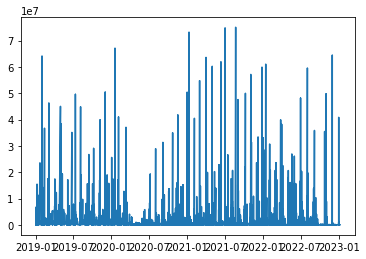

In [86]:
plt.plot(ts)

KeyError: 'dbr_date'